# Capstone Part Three |  Model Testing | Gino Sacco

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import joblib

from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import StandardScaler

In [13]:
## Read in first cleaned dataset

data = pd.read_csv('data/capstone/NFL_2009_2018_clean.csv')
print(data.shape)
data.sample(3)

(318691, 20)


,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,down,ydstogo,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone,play_type
96780,2012-09-09,2012090903,MIA,HOU,1,0,70.0,13,35.0,2,1.0,10,-14.0,0,0,2.0,1.0,0,0,0
17056,2009-11-15,2009111508,OAK,KC,1,1,84.0,18,75.0,2,1.0,10,-3.0,1,0,0.0,2.0,0,0,1
284641,2017-12-17,2017121708,LAR,SEA,0,0,47.0,14,79.0,2,1.0,10,27.0,1,0,3.0,3.0,0,0,0


In [14]:
## Read in 2019 dataset

test_2019 = pd.read_csv('data/capstone/NFL_2019_clean.csv')
print(test_2019.shape)
test_2019.sample(3)

(31975, 20)


,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,down,ydstogo,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone,play_type
28938,2019-12-22,2019122206,CLE,BAL,0,1,41.0,15,302.0,3,2.0,6,-15.0,1,0,3.0,3.0,0,0,1
15093,2019-10-31,2019103100,ARI,SF,0,1,24.0,16,606.0,4,2.0,19,-14.0,1,0,3.0,2.0,1,0,1
17042,2019-11-10,2019111002,CLE,BUF,0,1,29.0,13,237.0,3,3.0,6,0.0,1,0,3.0,3.0,1,0,1


In [15]:
## Split the dataset to previous season to predict "future" seasons (2009-2017 train data 2018-2019 testing data)

train = data[(~data.game_date.str.contains('2018'))]

test_2018 = data[(data.game_date.str.contains('2018'))]

In [21]:
## We need to get rid of all non numeric, non dicriptive features, (team names, game_id, game_date)

X_train = train.iloc[:,4:18]
y_train = train.iloc[:,-1]

X_test_2018 = test_2018.iloc[:,4:18]
y_test_2018 = test_2018.iloc[:,-1]

X_test_2019 = test_2019.iloc[:,4:18]
y_test_2019 = test_2019.iloc[:,-1]

In [22]:
## Scale the data with a standard scaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test_2018 = scaler.transform (X_test_2018)
X_test_2019 = scaler.transform (X_test_2019)

In [23]:
## make sure our data format is consistent

print(X_test_2018.shape)
print(X_test_2019.shape)


(29500, 14)
(31975, 14)


In [61]:
## Check the distribution of our data

freq1 = test_2018['play_type'].mean()
freq2 = test_2019['play_type'].mean()
print(f'Passing frequency in the 2018 season was {freq1}')
print(f'Passing frequency in the 2019 season was {freq2}')

Passing frequency in the 2018 season was 0.5935932203389831
Passing frequency in the 2019 season was 0.5936200156372166


Both test seasons have a consistent distribution of plays. Results beyond 59% accuracy would be better than always guessing every play will be a pass. Let's see how well the models predict!

In [17]:
## Machine Learning Testing 
## This block of code takes a while to run!

logit = LogisticRegression(random_state=24)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=24, max_depth = 5)
svm = LinearSVC(random_state=24)
gbc = GradientBoostingClassifier(random_state=24)
rf = RandomForestClassifier(random_state=24, max_depth=5)
gnb = GaussianNB()
xgb = XGBClassifier(random_state=24)
abc = AdaBoostClassifier(random_state=24)
nn = MLPClassifier(random_state=24)

models = [logit, dt, knn, svm, gbc, rf, gnb, xgb, abc, nn]
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM', 'Gradient Boost',
              'Random Forest', 'Naive Bayes', 'XGBoost', 'Ada Boost','MLP']

accuracy_scores_2018 = []
accuracy_scores_2019 = []

progress = 1

for model in models:
    model.fit(X_train, y_train)
    accuracy_scores_2018.append(model.score(X_test_2018, y_test_2018))
    accuracy_scores_2019.append(model.score(X_test_2019, y_test_2019))
    print(f'model {progress} of {len(models)} is complete')
    progress += 1


model 1 of 10 is complete
model 2 of 10 is complete
model 3 of 10 is complete


C:\Users\ginos\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


model 4 of 10 is complete
model 5 of 10 is complete
model 6 of 10 is complete
model 7 of 10 is complete
model 8 of 10 is complete
model 9 of 10 is complete
model 10 of 10 is complete


In [18]:
## Create and display dataframe of accuracy results of both seasons tested

results_df = pd.DataFrame(
        {'Model Name': model_names,
         'Accuracy Score 2018': accuracy_scores_2018,
         'Accuracy Score 2019': accuracy_scores_2019
        })
results_df.sort_values(by=['Accuracy Score 2018'], ascending=False)

,Model Name,Accuracy Score 2018,Accuracy Score 2019
7,XGBoost,0.725729,0.730446
9,MLP,0.724000,0.727318
4,Gradient Boost,0.722102,0.724441
1,Decision Tree,0.717119,0.717811
8,Ada Boost,0.716746,0.720250
5,Random Forest,0.716441,0.716122
3,SVM,0.712610,0.714058
0,Logistic Regression,0.710712,0.712901
6,Naive Bayes,0.703119,0.703518
2,KNN,0.685322,0.691321


Fairly consistent results accross the 10 different models tested. Going forward I will optimizing XGBoost Classifier as it gave me the best initial results.

In [27]:
## Hyperparameter tuning max_depth and min_child_weight
## This block of codes takes a long time to run!

param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 8.28444743,  7.94717016,  7.90817995, 10.94265723, 10.44915705,
         10.78005915, 13.51619353, 12.97427893, 13.37751446, 17.03060637,
         16.87153916, 19.88435845]),
  'std_fit_time': array([0.16289372, 0.3815156 , 0.2867834 , 0.29177499, 0.27625777,
         0.33765131, 0.47653282, 0.34552327, 0.3896309 , 0.42249685,
         0.51068366, 0.72221007]),
  'mean_score_time': array([0.07241611, 0.07001557, 0.07161574, 0.09982219, 0.09702163,
         0.09841881, 0.1448328 , 0.14823337, 0.14663296, 0.19194341,
         0.19364433, 0.20814304]),
  'std_score_time': array([0.00393053, 0.00469155, 0.00332371, 0.00116637, 0.00167343,
         0.00135628, 0.00292652, 0.00552939, 0.00422118, 0.00747472,
         0.01030916, 0.00515524]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?

In [38]:
## Testing optimal paramters for max_depth and min_child_weight

XGBtest1 = XGBClassifier(max_depth=7, min_child_weight=5, learning_rate =0.1, n_estimators=140,
           gamma=0, subsample=0.8, colsample_bytree=0.8,
           objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

XGBtest1.fit(X_train, y_train)
print(XGBtest1.score(X_test_2018, y_test_2018))
print(XGBtest1.score(X_test_2019, y_test_2019))

0.7270508474576272
0.7313838936669272


We got a slight improvement on both test sets from the base test (2018 base: 0.7257, 2018 optimized 0.7271) and (2019 base: 0.7304, 2019 optimized 0.7314). I will continue trying to tune a few more paramters to see if I can squeeze out a bit more accuracy.

In [49]:
## Tuning gamma paramter
## This block of code takes a long time to run!

param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(max_depth=7, min_child_weight=5, learning_rate =0.1, n_estimators=140,
           gamma=0, subsample=0.8, colsample_bytree=0.8,
           objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test2, scoring='roc_auc',cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([13.23052106, 13.24574556, 13.24855838, 13.53840957, 14.28421578]),
  'std_fit_time': array([0.283697  , 0.45846055, 0.2849528 , 0.20729323, 0.98784601]),
  'mean_score_time': array([0.14523215, 0.14613323, 0.14927335, 0.14453392, 0.15243411]),
  'std_score_time': array([0.00343057, 0.00540803, 0.00215137, 0.00352273, 0.00813277]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.79886681, 0.79911853, 0.79891348, 0.79919182, 0.79900656]),
  'split1_test_score': array([0.79692553, 0.79696385, 0.79698889, 0.79710383, 0.7969082 ]),
  'split2_test_score': array([0.79798546, 0.79783341, 0.79782819, 0.79803099, 0.79783559]),
  'split3_test_score': array([0.80736742, 0.80714477, 0.80726051, 0.80716148, 0.806981

In [48]:
## Test new model with gamma parameter set to 0.3

XGBtest2 = XGBClassifier(max_depth=7, min_child_weight=5, learning_rate =0.1, n_estimators=140,
           gamma=0.3, subsample=0.8, colsample_bytree=0.8,
           objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

XGBtest2.fit(X_train, y_train)
print(XGBtest2.score(X_test_2018, y_test_2018))
print(XGBtest2.score(X_test_2019, y_test_2019))

0.7272203389830508
0.7313213448006255


Some minor gains in the 2018 training set and some minor losses in the 2019 dataset. Lastly lets reduce the learning rate and increase the number of jobs to prevent overfitting and see if we can increase our accuracy.

In [50]:
## Lower learning rate to 0.1 and increase n_estinamtors to 2500

XGBtest3 = XGBClassifier(max_depth=7, min_child_weight=5, learning_rate =0.01, n_estimators=2500,
           gamma=0.3, subsample=0.8, colsample_bytree=0.8,
           objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

XGBtest3.fit(X_train, y_train)
print(XGBtest3.score(X_test_2018, y_test_2018))
print(XGBtest3.score(X_test_2019, y_test_2019))

0.7274915254237289
0.7315715402658327


after optimization I was able to get slighly higher accuracy scores for both sets of test data. I will now save this model and check other metrics such as F1 score, Recall, and Precision to see what this model is predicting.

Let's save this model and interpret the results

In [57]:
## Save optimized model to .pkl file

joblib.dump(XGBtest3, 'data/capstone/xgb_model.pkl')

['data/capstone/xgb_model.pkl']

In [31]:
## Reload the file make sure it saved correctly

reload_xgb = joblib.load('data/capstone/xgb_model.pkl')

In [27]:
## Test to see if I get the same results

print('2018 accuracy score is', reload_xgb.score(X_test_2018, y_test_2018))
print('2019 accuracy score is', reload_xgb.score(X_test_2019, y_test_2019))

2018 accuracy score is 0.7274915254237289
2019 accuracy score is 0.7315715402658327


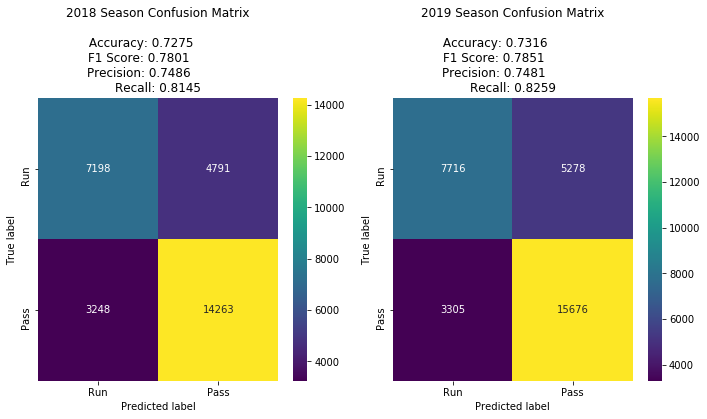

In [60]:
## Plot confusion matrix of 2018 and 2019 seasons

y_pred_2018 = reload_xgb.predict(X_test_2018)
cm_2018 = confusion_matrix(y_test_2018, y_pred_2018)

cm_2018 = pd.DataFrame(cm_2018, index = ['Run', 'Pass'],
           columns = ['Run', 'Pass'])

##

y_pred_2019 = reload_xgb.predict(X_test_2019)
cm_2019 = confusion_matrix(y_test_2019, y_pred_2019)

cm_2019 = pd.DataFrame(cm_2019, index = ['Run', 'Pass'],
           columns = ['Run', 'Pass'])
           
           
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.heatmap(cm_2018, annot=True,cmap='viridis', fmt='g')
plt.title(f'2018 Season Confusion Matrix\n \n Accuracy: {reload_xgb.score(X_test_2018, y_test_2018):.4f}\
          \nF1 Score: {f1_score(y_test_2018, y_pred_2018):.4f}\
          \nPrecision: {precision_score(y_test_2018, y_pred_2018):.4f}\
          \nRecall: {recall_score(y_test_2018, y_pred_2018):.4f}')
plt.ylabel('True label')
plt.xlabel('Predicted label')
           
plt.subplot(2,2,2)
sns.heatmap(cm_2019, annot=True,cmap='viridis', fmt='g')
plt.title(f'2019 Season Confusion Matrix\n \n Accuracy: {reload_xgb.score(X_test_2019, y_test_2019):.4f}\
          \nF1 Score: {f1_score(y_test_2019, y_pred_2019):.4f}\
          \nPrecision: {precision_score(y_test_2019, y_pred_2019):.4f}\
          \nRecall: {recall_score(y_test_2019, y_pred_2019):.4f}')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()



I'm quite happy to see the confusion matrixes across both season look pretty similar! These results lead me to believe I would get similar results during the 2020 season which is set to start up in Septmeber 2020. I will definatly be testing that data once the season starts.

In [28]:
## Add predictions back to the main dataframe which includes non-numeric features such as team names and game_date

pred_2018 = reload_xgb.predict(X_test_2018)
test_2018 = test_2018.reset_index(drop=True)
test_2018['predictions'] = pred_2018
test_2018

,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,...,ydstogo,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone,play_type,predictions
0,2018-09-06,2018090600,ATL,PHI,1,0,80.0,1,900.0,1,...,15,0.0,0,0,3.0,3.0,0,0,1,0
1,2018-09-06,2018090600,ATL,PHI,1,0,70.0,1,862.0,1,...,5,0.0,0,0,3.0,3.0,0,0,0,0
2,2018-09-06,2018090600,ATL,PHI,1,0,59.0,1,826.0,1,...,10,0.0,0,0,3.0,3.0,0,0,0,0
3,2018-09-06,2018090600,ATL,PHI,0,0,39.0,1,790.0,1,...,10,0.0,0,0,3.0,3.0,0,0,1,0
4,2018-09-06,2018090600,ATL,PHI,0,0,39.0,1,785.0,1,...,10,0.0,1,0,3.0,3.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29495,2018-12-17,2018121700,CAR,NO,1,1,71.0,20,82.0,4,...,1,-5.0,1,1,0.0,1.0,0,0,1,1
29496,2018-12-17,2018121700,CAR,NO,1,1,71.0,20,77.0,4,...,1,-5.0,1,0,0.0,1.0,0,0,1,1
29497,2018-12-17,2018121700,CAR,NO,1,1,66.0,20,63.0,4,...,10,-5.0,1,0,0.0,1.0,0,0,1,1
29498,2018-12-17,2018121700,CAR,NO,1,1,66.0,20,58.0,4,...,10,-5.0,1,0,0.0,1.0,0,0,1,1


In [29]:
## Create a new column showing whether the prediction was correct or not. 1 = correct prediction, 0 = incorrect prediction

test_2018['correct_pred'] = np.where(test_2018['play_type'] == test_2018['predictions'], 1, 0)
test_2018.head()

,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,...,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone,play_type,predictions,correct_pred
0,2018-09-06,2018090600,ATL,PHI,1,0,80.0,1,900.0,1,...,0.0,0,0,3.0,3.0,0,0,1,0,0
1,2018-09-06,2018090600,ATL,PHI,1,0,70.0,1,862.0,1,...,0.0,0,0,3.0,3.0,0,0,0,0,1
2,2018-09-06,2018090600,ATL,PHI,1,0,59.0,1,826.0,1,...,0.0,0,0,3.0,3.0,0,0,0,0,1
3,2018-09-06,2018090600,ATL,PHI,0,0,39.0,1,790.0,1,...,0.0,0,0,3.0,3.0,0,0,1,0,0
4,2018-09-06,2018090600,ATL,PHI,0,0,39.0,1,785.0,1,...,0.0,1,0,3.0,3.0,0,0,1,1,1


In [81]:
## Add predictions to 2019 data

pred_2019 = reload_xgb.predict(X_test_2019)
test_2019 = test_2019.reset_index(drop=True)
test_2019['predictions'] = pred_2019
test_2019

,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,...,ydstogo,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone,play_type,predictions
0,2019-09-05,2019090500,GB,CHI,1,0,75.0,1,900.0,1,...,10,0.0,0,0,3.0,3.0,0,0,0,0
1,2019-09-05,2019090500,GB,CHI,1,0,75.0,1,873.0,1,...,10,0.0,0,0,3.0,3.0,0,0,1,0
2,2019-09-05,2019090500,GB,CHI,1,0,75.0,1,825.0,1,...,10,0.0,1,0,3.0,3.0,0,0,1,1
3,2019-09-05,2019090500,CHI,GB,1,1,52.0,2,753.0,1,...,10,0.0,1,0,3.0,3.0,0,0,0,1
4,2019-09-05,2019090500,CHI,GB,0,1,47.0,2,718.0,1,...,5,0.0,1,0,3.0,3.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31970,2019-12-29,2019122915,SEA,SF,0,1,12.0,16,42.0,4,...,10,-5.0,1,0,0.0,1.0,1,1,1,1
31971,2019-12-29,2019122915,SEA,SF,0,1,5.0,16,22.0,4,...,5,-5.0,1,0,0.0,1.0,1,1,1,1
31972,2019-12-29,2019122915,SEA,SF,0,1,5.0,16,15.0,4,...,5,-5.0,1,0,0.0,1.0,1,1,1,1
31973,2019-12-29,2019122915,SEA,SF,0,1,5.0,16,12.0,4,...,5,-5.0,1,0,0.0,1.0,1,1,1,1


In [85]:
## Add new column of correct or incorrect prediction

test_2019['correct_pred'] = np.where(test_2019['play_type'] == test_2019['predictions'], 1, 0)
test_2019.head()

,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,...,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone,play_type,predictions,correct_pred
0,2019-09-05,2019090500,GB,CHI,1,0,75.0,1,900.0,1,...,0.0,0,0,3.0,3.0,0,0,0,0,1
1,2019-09-05,2019090500,GB,CHI,1,0,75.0,1,873.0,1,...,0.0,0,0,3.0,3.0,0,0,1,0,0
2,2019-09-05,2019090500,GB,CHI,1,0,75.0,1,825.0,1,...,0.0,1,0,3.0,3.0,0,0,1,1,1
3,2019-09-05,2019090500,CHI,GB,1,1,52.0,2,753.0,1,...,0.0,1,0,3.0,3.0,0,0,0,1,0
4,2019-09-05,2019090500,CHI,GB,0,1,47.0,2,718.0,1,...,0.0,1,0,3.0,3.0,0,0,1,1,1


In [89]:
## Finnally save these dataframes as csv files for later interpretation

test_2018.to_csv('data/capstone/NFL2018.csv', index=False)
test_2019.to_csv('data/capstone/NFL2019.csv', index=False)